In [1]:
import xarray as xr
import numpy as np
from xcube_resampling.affine import affine_transform_dataset
from xcube_resampling.gridmapping import GridMapping

In [2]:
def imshow(var):
    var.plot.imshow(vmin=0, vmax=4)

In [3]:
res = 0.1
source_ds = xr.Dataset(
    data_vars=dict(
        refl=xr.DataArray(
            np.array(
                [
                    [0, 1, 0, 2, 0, 3, 0, 4],
                    [2, 0, 3, 0, 4, 0, 1, 0],
                    [0, 4, 0, 1, 0, 2, 0, 3],
                    [1, 0, 2, 0, 3, 0, 4, 0],
                    [0, 3, 0, 4, 0, 1, 0, 2],
                    [4, 0, 1, 0, 2, 0, 3, 0],
                ],
                dtype=np.float64,
            ),
            dims=("lat", "lon"),
        )
    ),
    coords=dict(
        lon=xr.DataArray(50.0 + res * np.arange(0, 8) + 0.5 * res, dims="lon"),
        lat=xr.DataArray(10.6 - res * np.arange(0, 6) - 0.5 * res, dims="lat"),
    ),
)
source_ds

<xarray.Dataset> Size: 496B
Dimensions:  (lon: 8, lat: 6)
Coordinates:
  * lon      (lon) float64 64B 50.05 50.15 50.25 50.35 50.45 50.55 50.65 50.75
  * lat      (lat) float64 48B 10.55 10.45 10.35 10.25 10.15 10.05
Data variables:
    refl     (lat, lon) float64 384B 0.0 1.0 0.0 2.0 0.0 ... 0.0 2.0 0.0 3.0 0.0

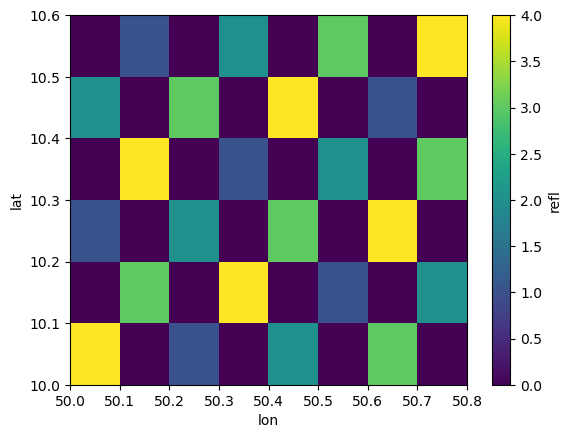

In [4]:
imshow(source_ds.refl)

In [5]:
source_gm = GridMapping.from_dataset(source_ds)
source_gm.xy_bbox, source_gm.xy_res

((50, 10, 50.8, 10.6), (0.1, 0.1))

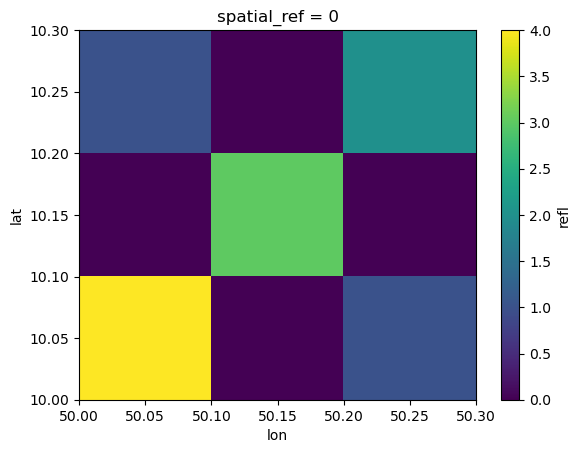

In [6]:
target_gm = GridMapping.regular((3, 3), (50, 10), 0.1, source_gm.crs)
# target_gm.ij_to_xy_transform, target_gm.xy_to_ij_transform
target_ds = affine_transform_dataset(source_ds, target_gm, interp_methods=1)
imshow(target_ds.refl)

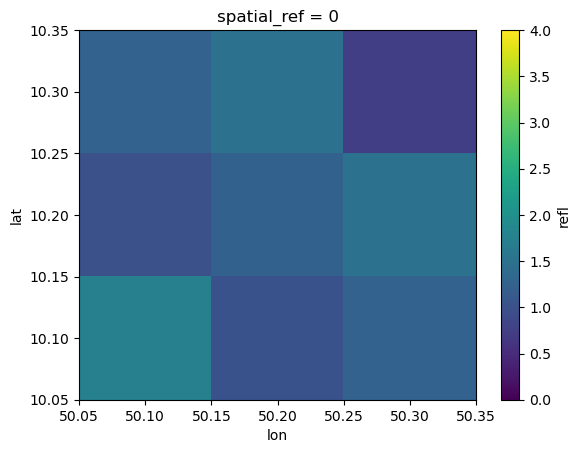

In [7]:
target_gm = GridMapping.regular((3, 3), (50.05, 10.05), 0.1, source_gm.crs)
# target_gm.ij_to_xy_transform, target_gm.xy_to_ij_transform
target_ds = affine_transform_dataset(source_ds, target_gm, interp_methods="bilinear")
imshow(target_ds.refl)

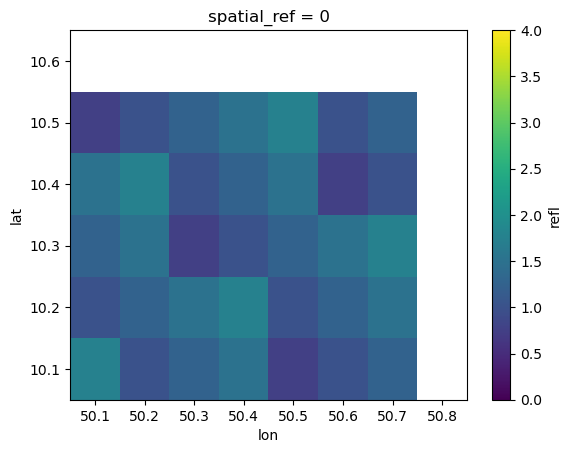

In [8]:
target_gm = GridMapping.regular((8, 6), (50.05, 10.05), 0.1, source_gm.crs)
# target_gm.ij_to_xy_transform, target_gm.xy_to_ij_transform
target_ds = affine_transform_dataset(source_ds, target_gm, interp_methods=dict(refl= 1))
imshow(target_ds.refl)

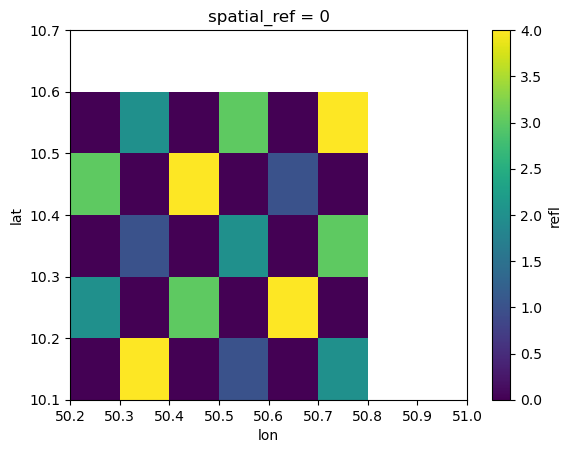

In [9]:
target_gm = GridMapping.regular((8, 6), (50.2, 10.1), 0.1, source_gm.crs)
# target_gm.ij_to_xy_transform, target_gm.xy_to_ij_transform
target_ds = affine_transform_dataset(source_ds, target_gm, interp_methods=dict(refl="bilinear"))
imshow(target_ds.refl)

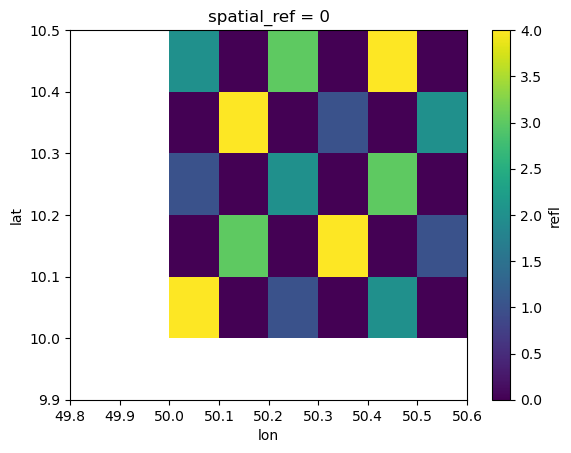

In [10]:
target_gm = GridMapping.regular((8, 6), (49.8, 9.9), 0.1, source_gm.crs)
# target_gm.ij_to_xy_transform, target_gm.xy_to_ij_transform
target_ds = affine_transform_dataset(source_ds, target_gm, interp_methods=1)
imshow(target_ds.refl)

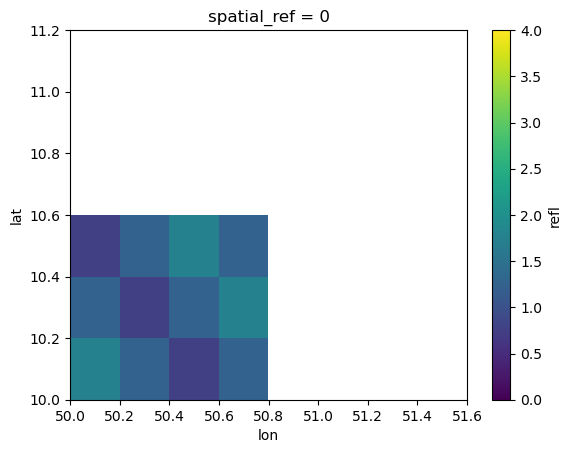

In [11]:
target_gm = GridMapping.regular((8, 6), (50, 10), 0.2, source_gm.crs)
# target_gm.ij_to_xy_transform, target_gm.xy_to_ij_transform
target_ds = affine_transform_dataset(source_ds, target_gm, interp_methods=1)
imshow(target_ds.refl)

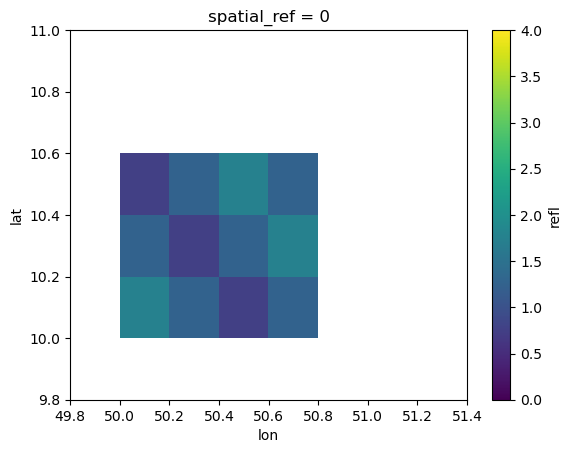

In [12]:
target_gm = GridMapping.regular((8, 6), (49.8, 9.8), 0.2, source_gm.crs)
# target_gm.ij_to_xy_transform, target_gm.xy_to_ij_transform
target_ds = affine_transform_dataset(source_ds, target_gm, interp_methods=1)
imshow(target_ds.refl)

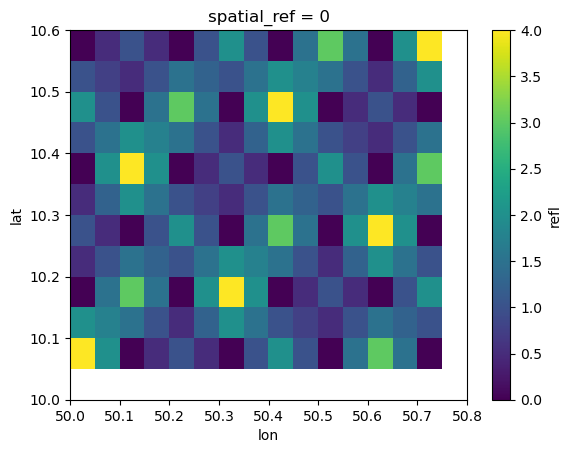

In [13]:
target_gm = GridMapping.regular((16, 12), (50, 10), 0.05, source_gm.crs)
# target_gm.ij_to_xy_transform, target_gm.xy_to_ij_transform
target_ds = affine_transform_dataset(source_ds, target_gm, interp_methods=1)
imshow(target_ds.refl)